## Importing required libraries

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import descartes
import matplotlib.pyplot as plt
import dataframe_image as dfi
import folium
from IPython.display import Image
from PIL import Image
%matplotlib inline

## Reading Dataset

In [3]:
usa_df = gpd.read_file('../Data/usa_data/map.shp')

## Checking top 5 values

In [4]:
usa_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,20,175,00485050,0500000US20175,20175,Seward,06,1655865960,2777350,"POLYGON ((-101.06790 37.38778, -100.65273 37.3..."
1,28,141,00695791,0500000US28141,28141,Tishomingo,06,1098939230,52359814,"POLYGON ((-88.36353 34.99575, -88.25811 34.995..."
2,36,101,00974148,0500000US36101,36101,Steuben,06,3601566799,34993606,"POLYGON ((-77.72296 42.47122, -77.72062 42.535..."
3,50,013,01461763,0500000US50013,50013,Grand Isle,06,211894597,292303559,"POLYGON ((-73.38997 44.61962, -73.36556 44.700..."
4,05,065,00066860,0500000US05065,05065,Izard,06,1503685418,8912603,"POLYGON ((-92.21390 36.17510, -92.15986 36.173..."


## Plotting Graph

C:\Users\GOD\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


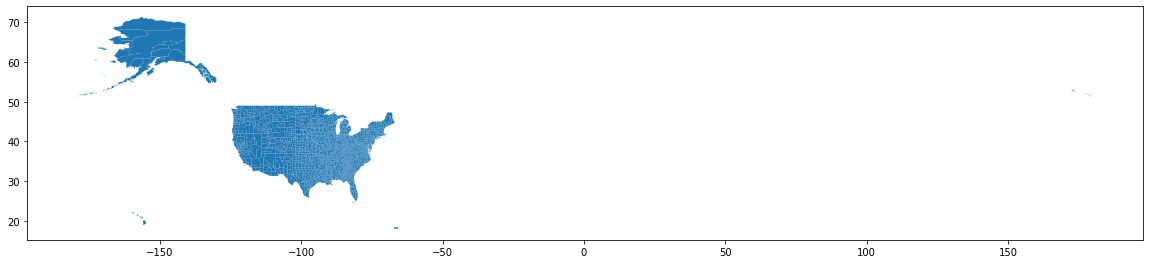

In [5]:
usa_df.plot(figsize = (20,20))

## Changing the co-ordinates of X & Y axis to plot graph

C:\Users\GOD\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


(20.0, 50.0)

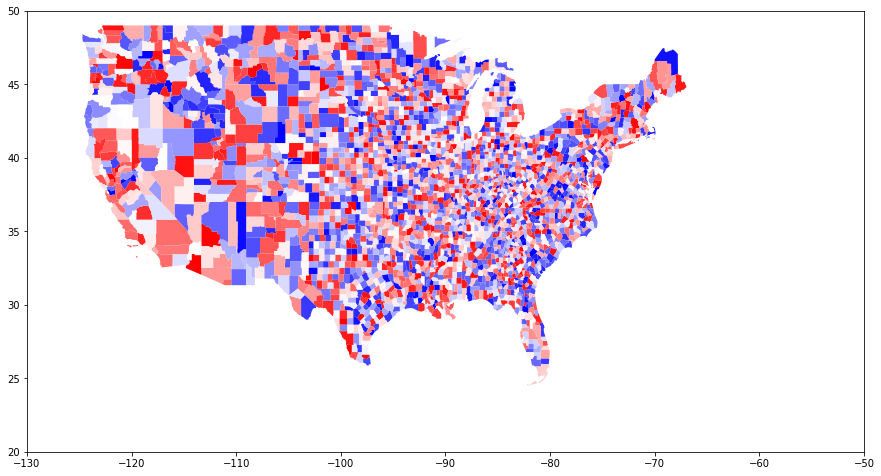

In [6]:
# Colours which can be used in cmap
#cmap = 'bwr' | 'GnBu' | 'jet'

ax = usa_df.plot(figsize = (15,15), column = 'NAME', cmap = 'bwr') #facecolor = '#00000050', edgecolor = 'blue')
ax.set_xlim(-130,-50)
ax.set_ylim(20,50)
#ax.plot(ax=ax, markersize = 15)

## Checking CRS

In [7]:
usa_df.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

## Using .to_crs() function

In [13]:
usa_EPSG_4326_df = usa_df.to_crs('EPSG:4326')

C:\Users\GOD\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


(20.0, 50.0)

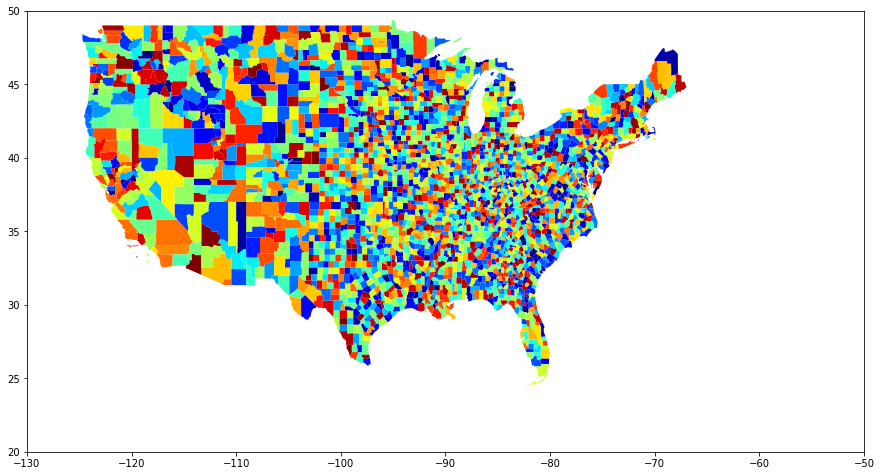

In [17]:
bx = usa_EPSG_4326_df.plot(figsize = (15,15), column = 'NAME', cmap = 'jet')
bx.set_xlim(-130,-50)
bx.set_ylim(20,50)

## pyproj function

### pyproj.CRS()

### 'pyproj.CRS()'  is a method from the PyProj library that creates a Coordinate Reference System (CRS) object. The CRS() method takes a string argument representing the EPSG (European Petroleum Survey Group) code of the CRS. The EPSG code is a unique identifier for a CRS and can be used to identify and transform coordinates between different CRSs.

In [8]:
import pyproj

# create a CRS object for WGS 84
crs_wgs84 = pyproj.CRS("EPSG:4326")

In [9]:
crs_wgs84

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# create a CRS object for UTM zone 10N
crs_utm10n = pyproj.CRS("EPSG:32610")

In [10]:
crs_utm10n

<Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## pyproj.transform()

### pyproj.transform() is a method from the PyProj library that allows you to transform coordinates between different Coordinate Reference Systems (CRSs). The method takes four arguments: the source CRS, the destination CRS, the x-coordinate, and the y-coordinate.

In [18]:
# create CRS objects for WGS 84 and UTM zone 10N
crs_wgs84 = pyproj.CRS("EPSG:4326")
crs_utm10n = pyproj.CRS("EPSG:32610")

# define a point in WGS 84 coordinates (longitude, latitude)
lon, lat = -118.409, 33.943

# transform the point to UTM 10N coordinates (eastings, northings)
easting, northing = pyproj.transform(crs_wgs84, crs_utm10n, lon, lat)

C:\Users\GOD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  if __name__ == '__main__':


## Basemap

## Basemap is a library that allows you to create maps and work with CRSs.

###  'Basemap()'  is a method from the Basemap library, which is a deprecated library for creating static maps in Python. It allows you to create map projections and plot data on them using a variety of built-in map projections, including cylindrical, conic, and azimuthal projections

In [38]:
# To install basemap

# !pip install basemap
# !pip install basemap-data

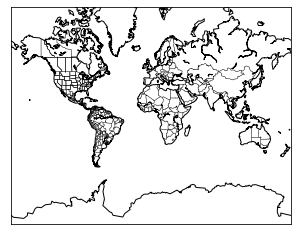

In [37]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# create a map projection centered on the Pacific Ocean
m = Basemap(projection='merc', llcrnrlon=-180, llcrnrlat=-80, urcrnrlon=180, urcrnrlat=80)

# draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# show the map
plt.show()